In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import itertools as it
import sys
sys.path.append("..")
from src import hierarchic_blending_operator
from src import color_converter
from src import color_operations
from src import color_schemes
from src import picture_worker
from src import helper

In [2]:
# For autotesting
%load_ext autoreload
%autoreload 2

In [3]:
width = 9.5
height = 9.5
plt.rcParams['figure.figsize'] = [width, height]

In [4]:
def generate_gaussians(gaussians):
    return [helper.get_gaussian(*gaussian)[2] for gaussian in gaussians]

In [5]:
size = 200

In [6]:
method = "normal"

In [7]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
mu_x, mu_y = 0,0
variance_x, variance_y = 25,25
gaussian_static = [x_min, x_max, y_min, y_max, mu_x, variance_x, mu_y, variance_y, size]

In [8]:
colorschemes = color_schemes.get_colorbrewer_schemes()

In [9]:
color_codes = [color_schemes.get_main_color(i)[-4] for i in colorschemes]

In [10]:
images_overlapping = []
z_sums = []
gaussians = []
static_gaussian_rep = [gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy()]
for i in range(1,len(static_gaussian_rep)+1):
    if i == 1:
        static_gaussian_rep[0][5] = 1 
        static_gaussian_rep[0][7] = 1
    else:
        static_gaussian_rep[0][5] = i * 3 
        static_gaussian_rep[0][7] = i * 3
    static_gaussian_rep[1][4] = +2.5
    static_gaussian_rep[1][6] = +2.5
    static_gaussian_rep[2][4] = -2.5
    static_gaussian_rep[2][6] = -2.5
    static_gaussian_rep[3][4] = +2.5
    static_gaussian_rep[3][6] = -2.5
    static_gaussian_rep[4][4] = -2.5
    static_gaussian_rep[4][6] = +2.5
    
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:5], colorschemes,method=method, use_c_implementation=True, color_space="lab")
    images_overlapping.append(image)
    z_sums.append(z_sum)
    gaussians.append([i.copy() for i in static_gaussian_rep[:5]])

[[-10, 10, -10, 10, 0, 1, 0, 1, 200], [-10, 10, -10, 10, 2.5, 25, 2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, -2.5, 25, 200], [-10, 10, -10, 10, 2.5, 25, -2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, 2.5, 25, 200]]
[[-10, 10, -10, 10, 0, 6, 0, 6, 200], [-10, 10, -10, 10, 2.5, 25, 2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, -2.5, 25, 200], [-10, 10, -10, 10, 2.5, 25, -2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, 2.5, 25, 200]]
[[-10, 10, -10, 10, 0, 9, 0, 9, 200], [-10, 10, -10, 10, 2.5, 25, 2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, -2.5, 25, 200], [-10, 10, -10, 10, 2.5, 25, -2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, 2.5, 25, 200]]
[[-10, 10, -10, 10, 0, 12, 0, 12, 200], [-10, 10, -10, 10, 2.5, 25, 2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, -2.5, 25, 200], [-10, 10, -10, 10, 2.5, 25, -2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, 2.5, 25, 200]]
[[-10, 10, -10, 10, 0, 15, 0, 15, 200], [-10, 10, -10, 10, 2.5, 25, 2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, -2.5, 25, 200], [-10, 10, -10,

In [11]:
static_gaussian_rep = [gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy()]
for i in range(1,len(static_gaussian_rep)+1):
    v = i*2
    static_gaussian_rep[1][4] = +v
    static_gaussian_rep[1][6] = +v
    static_gaussian_rep[2][4] = -v
    static_gaussian_rep[2][6] = -v
    static_gaussian_rep[3][4] = +v
    static_gaussian_rep[3][6] = -v
    static_gaussian_rep[4][4] = -v
    static_gaussian_rep[4][6] = +v
    
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[1:5], colorschemes,method=method, use_c_implementation=True, color_space="lab")
    images_overlapping.append(image)
    z_sums.append(z_sum)
    gaussians.append([i.copy() for i in static_gaussian_rep[1:5]])

[[-10, 10, -10, 10, 0, 25, 0, 25, 200], [-10, 10, -10, 10, 2, 25, 2, 25, 200], [-10, 10, -10, 10, -2, 25, -2, 25, 200], [-10, 10, -10, 10, 2, 25, -2, 25, 200], [-10, 10, -10, 10, -2, 25, 2, 25, 200]]
[[-10, 10, -10, 10, 0, 25, 0, 25, 200], [-10, 10, -10, 10, 4, 25, 4, 25, 200], [-10, 10, -10, 10, -4, 25, -4, 25, 200], [-10, 10, -10, 10, 4, 25, -4, 25, 200], [-10, 10, -10, 10, -4, 25, 4, 25, 200]]
[[-10, 10, -10, 10, 0, 25, 0, 25, 200], [-10, 10, -10, 10, 6, 25, 6, 25, 200], [-10, 10, -10, 10, -6, 25, -6, 25, 200], [-10, 10, -10, 10, 6, 25, -6, 25, 200], [-10, 10, -10, 10, -6, 25, 6, 25, 200]]
[[-10, 10, -10, 10, 0, 25, 0, 25, 200], [-10, 10, -10, 10, 8, 25, 8, 25, 200], [-10, 10, -10, 10, -8, 25, -8, 25, 200], [-10, 10, -10, 10, 8, 25, -8, 25, 200], [-10, 10, -10, 10, -8, 25, 8, 25, 200]]
[[-10, 10, -10, 10, 0, 25, 0, 25, 200], [-10, 10, -10, 10, 10, 25, 10, 25, 200], [-10, 10, -10, 10, -10, 25, -10, 25, 200], [-10, 10, -10, 10, 10, 25, -10, 25, 200], [-10, 10, -10, 10, -10, 25, 10, 25

In [12]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
mu_x, mu_y = 0,0
variance_x, variance_y = 5,5
gaussian_static = [x_min, x_max, y_min, y_max, mu_x, variance_x, mu_y, variance_y, size]

In [13]:
static_gaussian_rep = [gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy()]
for i in range(1,len(static_gaussian_rep)+1):
    v = 0.5*i
    static_gaussian_rep[1][4] = -v
    static_gaussian_rep[1][6] = -v
    static_gaussian_rep[3][4] = -v
    static_gaussian_rep[3][6] = +v
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep, colorschemes,method=method, use_c_implementation=True, color_space="lab")
    images_overlapping.append(image)
    z_sums.append(z_sum)
    gaussians.append([i.copy() for i in static_gaussian_rep])

[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -0.5, 5, -0.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -0.5, 5, 0.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -1.0, 5, -1.0, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -1.0, 5, 1.0, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -1.5, 5, -1.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -1.5, 5, 1.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -2.0, 5, -2.0, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -2.0, 5, 2.0, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -2.5, 5, -2.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -2.5, 5, 2.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]


In [14]:
static_gaussian_rep = [gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy()]
for i in range(1,len(static_gaussian_rep)+1):
    v = 0.5*i
    static_gaussian_rep[1][4] = -4
    static_gaussian_rep[2][4] = -v
    static_gaussian_rep[2][6] = -v
    static_gaussian_rep[3][4] = -v
    static_gaussian_rep[3][6] = +v
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:4], colorschemes,method=method, use_c_implementation=True, color_space="lab")
    images_overlapping.append(image)
    z_sums.append(z_sum)
    gaussians.append([i.copy() for i in static_gaussian_rep[:4]])

[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -4, 5, 0, 5, 200], [-10, 10, -10, 10, -0.5, 5, -0.5, 5, 200], [-10, 10, -10, 10, -0.5, 5, 0.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -4, 5, 0, 5, 200], [-10, 10, -10, 10, -1.0, 5, -1.0, 5, 200], [-10, 10, -10, 10, -1.0, 5, 1.0, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -4, 5, 0, 5, 200], [-10, 10, -10, 10, -1.5, 5, -1.5, 5, 200], [-10, 10, -10, 10, -1.5, 5, 1.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -4, 5, 0, 5, 200], [-10, 10, -10, 10, -2.0, 5, -2.0, 5, 200], [-10, 10, -10, 10, -2.0, 5, 2.0, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -4, 5, 0, 5, 200], [-10, 10, -10, 10, -2.5, 5, -2.5, 5, 200], [-10, 10, -10, 10, -2.5, 5, 2.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]


Wie verhalten sich die Contourlinien im Vergleich zu den Gaussians. Wie viele Gaussians sind zu erkennen obwohl es nur 4 gibt. Wie viele Gaussians fehlen/entstehen?

In [15]:
method = "equal_density"

In [16]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
mu_x, mu_y = 0,0
variance_x, variance_y = 25,25
gaussian_static = [x_min, x_max, y_min, y_max, mu_x, variance_x, mu_y, variance_y, size]

In [17]:
images_overlapping_equal = []
z_sums_equal = []
gaussians_equal = []
static_gaussian_rep = [gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy()]
for i in range(1,len(static_gaussian_rep)+1):
    if i == 1:
        static_gaussian_rep[0][5] = 1 
        static_gaussian_rep[0][7] = 1
    else:
        static_gaussian_rep[0][5] = i * 3 
        static_gaussian_rep[0][7] = i * 3
    static_gaussian_rep[1][4] = +2.5
    static_gaussian_rep[1][6] = +2.5
    static_gaussian_rep[2][4] = -2.5
    static_gaussian_rep[2][6] = -2.5
    static_gaussian_rep[3][4] = +2.5
    static_gaussian_rep[3][6] = -2.5
    static_gaussian_rep[4][4] = -2.5
    static_gaussian_rep[4][6] = +2.5
    
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:5], colorschemes,method=method, use_c_implementation=True, color_space="lab")
    images_overlapping_equal.append(image)
    z_sums_equal.append(z_sum)
    gaussians_equal.append([i.copy() for i in static_gaussian_rep[:5]])

[[-10, 10, -10, 10, 0, 1, 0, 1, 200], [-10, 10, -10, 10, 2.5, 25, 2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, -2.5, 25, 200], [-10, 10, -10, 10, 2.5, 25, -2.5, 25, 200], [-10, 10, -10, 10, -2.5, 25, 2.5, 25, 200]]
[9089, 9258, 9368, 9445, 9503, 9552, 9590, 9621, 9651, 9679]
[9090 9259 9369 9446 9504 9553 9591 9622 9652 9680]
[9129, 9315, 9423, 9498, 9558, 9602, 9640, 9673]
[9130 9316 9424 9499 9559 9603 9641 9674]
[7463, 9822, 11400, 12674, 13749, 14668, 15466, 16182, 16826, 17419]
[ 7464  9823 11401 12675 13750 14669 15467 16183 16827 17420]
[8107, 10576, 12276, 13639, 14758, 15708, 16547, 17293]
[ 8108 10577 12277 13640 14759 15709 16548 17294]
[7544, 9817, 11329, 12532, 13557, 14433, 15205, 15901, 16536, 17130]
[ 7545  9818 11330 12533 13558 14434 15206 15902 16537 17131]
[8171, 10542, 12152, 13448, 14522, 15441, 16258, 17001]
[ 8172 10543 12153 13449 14523 15442 16259 17002]
[9930, 12983, 14944, 16493, 17802, 18894, 19866, 20710, 21448, 22107]
[ 9931 12984 14945 16494 17803 18895 1

In [18]:
static_gaussian_rep = [gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy()]
for i in range(1,len(static_gaussian_rep)+1):
    v = i*2
    static_gaussian_rep[1][4] = +v
    static_gaussian_rep[1][6] = +v
    static_gaussian_rep[2][4] = -v
    static_gaussian_rep[2][6] = -v
    static_gaussian_rep[3][4] = +v
    static_gaussian_rep[3][6] = -v
    static_gaussian_rep[4][4] = -v
    static_gaussian_rep[4][6] = +v
    
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[1:5], colorschemes,method=method, use_c_implementation=True, color_space="lab")
    images_overlapping_equal.append(image)
    z_sums_equal.append(z_sum)
    gaussians_equal.append([i.copy() for i in static_gaussian_rep[1:5]])

[[-10, 10, -10, 10, 0, 25, 0, 25, 200], [-10, 10, -10, 10, 2, 25, 2, 25, 200], [-10, 10, -10, 10, -2, 25, -2, 25, 200], [-10, 10, -10, 10, 2, 25, -2, 25, 200], [-10, 10, -10, 10, -2, 25, 2, 25, 200]]
[6744, 9059, 10634, 11900, 12936, 13822, 14595, 15282, 15898, 16458]
[ 6745  9060 10635 11901 12937 13823 14596 15283 15899 16459]
[7368, 9810, 11512, 12828, 13911, 14833, 15628, 16339]
[ 7369  9811 11513 12829 13912 14834 15629 16340]
[6817, 9053, 10503, 11681, 12639, 13484, 14230, 14908, 15525, 16091]
[ 6818  9054 10504 11682 12640 13485 14231 14909 15526 16092]
[7437, 9744, 11315, 12538, 13568, 14455, 15258, 15971]
[ 7438  9745 11316 12539 13569 14456 15259 15972]
[9070, 12049, 13964, 15468, 16668, 17699, 18595, 19396, 20108, 20753]
[ 9071 12050 13965 15469 16669 17700 18596 19397 20109 20754]
[9904, 12978, 15007, 16540, 17803, 18875, 19808, 20620]
[ 9905 12979 15008 16541 17804 18876 19809 20621]
[9070, 12049, 13964, 15468, 16668, 17699, 18595, 19396, 20108, 20753]
[ 9071 12050 13965 1

In [19]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
mu_x, mu_y = 0,0
variance_x, variance_y = 5,5
gaussian_static = [x_min, x_max, y_min, y_max, mu_x, variance_x, mu_y, variance_y, size]

In [20]:
static_gaussian_rep = [gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy()]
for i in range(1,len(static_gaussian_rep)+1):
    v = 0.5*i
    static_gaussian_rep[1][4] = -v
    static_gaussian_rep[1][6] = -v
    static_gaussian_rep[3][4] = -v
    static_gaussian_rep[3][6] = +v
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep, colorschemes,method=method, use_c_implementation=True, color_space="lab")
    images_overlapping_equal.append(image)
    z_sums_equal.append(z_sum)
    gaussians_equal.append([i.copy() for i in static_gaussian_rep])

[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -0.5, 5, -0.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -0.5, 5, 0.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[6434, 6846, 7089, 7255, 7377, 7475, 7583, 7697, 7785, 7859]
[6435 6847 7090 7256 7378 7476 7584 7698 7786 7860]
[6555, 6970, 7204, 7364, 7484, 7627, 7749, 7847]
[6556 6971 7205 7365 7485 7628 7750 7848]
[16221, 17296, 17928, 18376, 18723, 19009, 19251, 19461, 19646, 19813]
[16222 17297 17929 18377 18724 19010 19252 19462 19647 19814]
[16533, 17610, 18240, 18688, 19037, 19324, 19567, 19777]
[16534 17611 18241 18689 19038 19325 19568 19778]
[6434, 6846, 7089, 7255, 7377, 7475, 7583, 7697, 7785, 7859]
[6435 6847 7090 7256 7378 7476 7584 7698 7786 7860]
[6555, 6970, 7204, 7364, 7484, 7627, 7749, 7847]
[6556 6971 7205 7365 7485 7628 7750 7848]
[25872, 27658, 28669, 29382, 29946, 30382, 30793, 31149, 31470, 31770]
[25873 27659 28670 29383 29947 30383 30794 31150 31471 31771]
[26384, 28161, 29166, 

In [21]:
static_gaussian_rep = [gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy(), gaussian_static.copy()]
for i in range(1,len(static_gaussian_rep)+1):
    v = 0.5*i
    static_gaussian_rep[1][4] = -4
    static_gaussian_rep[2][4] = -v
    static_gaussian_rep[2][6] = -v
    static_gaussian_rep[3][4] = -v
    static_gaussian_rep[3][6] = +v
    print(static_gaussian_rep)
    z_list, image, z_sum = picture_worker.generate_image(static_gaussian_rep[:4], colorschemes,method=method, use_c_implementation=True, color_space="lab")
    images_overlapping_equal.append(image)
    z_sums_equal.append(z_sum)
    gaussians_equal.append([i.copy() for i in static_gaussian_rep[:4]])

[[-10, 10, -10, 10, 0, 5, 0, 5, 200], [-10, 10, -10, 10, -4, 5, 0, 5, 200], [-10, 10, -10, 10, -0.5, 5, -0.5, 5, 200], [-10, 10, -10, 10, -0.5, 5, 0.5, 5, 200], [-10, 10, -10, 10, 0, 5, 0, 5, 200]]
[6434, 6846, 7089, 7255, 7377, 7475, 7583, 7697, 7785, 7859]
[6435 6847 7090 7256 7378 7476 7584 7698 7786 7860]
[6555, 6970, 7204, 7364, 7484, 7627, 7749, 7847]
[6556 6971 7205 7365 7485 7628 7750 7848]
[19992, 21326, 22078, 22597, 22994, 23312, 23622, 23919, 24173, 24383]
[19993 21327 22079 22598 22995 23313 23623 23920 24174 24384]
[20376, 21707, 22442, 22954, 23341, 23727, 24065, 24341]
[20377 21708 22443 22955 23342 23728 24066 24342]
[16221, 17296, 17928, 18376, 18723, 19009, 19251, 19461, 19646, 19813]
[16222 17297 17929 18377 18724 19010 19252 19462 19647 19814]
[16533, 17610, 18240, 18688, 19037, 19324, 19567, 19777]
[16534 17611 18241 18689 19038 19325 19568 19778]
[25872, 27658, 28669, 29382, 29946, 30382, 30793, 31149, 31470, 31770]
[25873 27659 28670 29383 29947 30383 30794 3115

In [28]:
from src import picture_worker

['mu_x', 'variance_x', 'mu_y', 'variance_y']


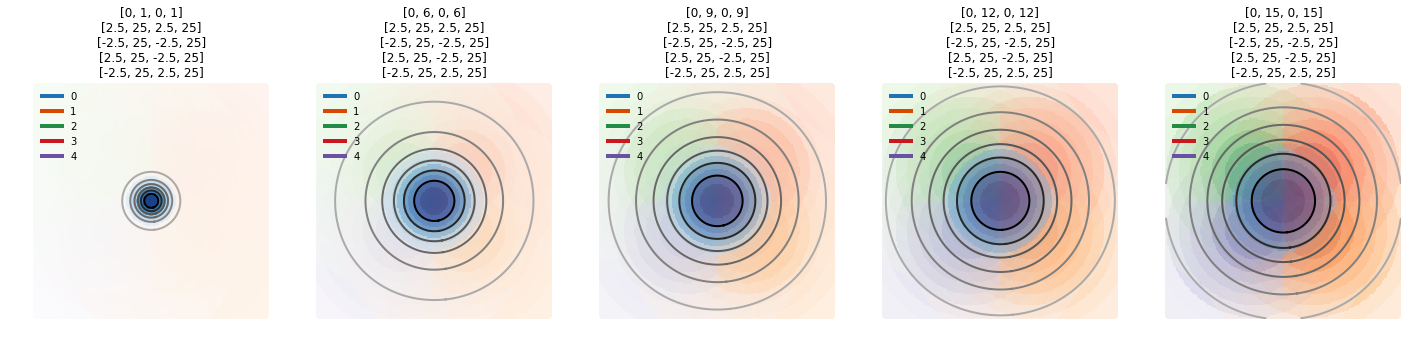

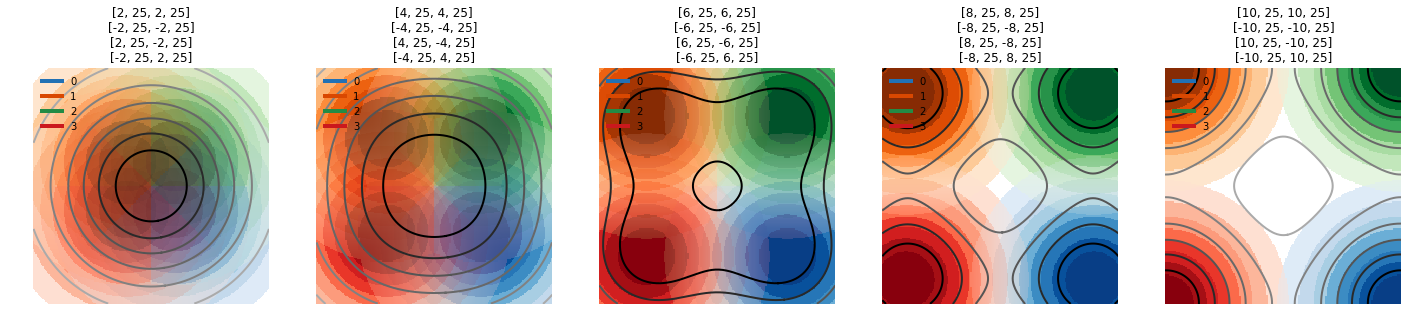

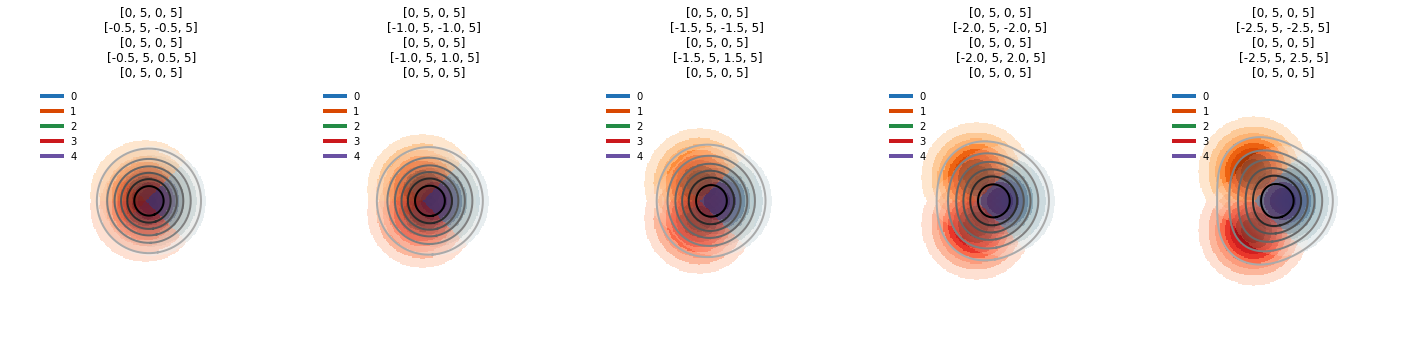

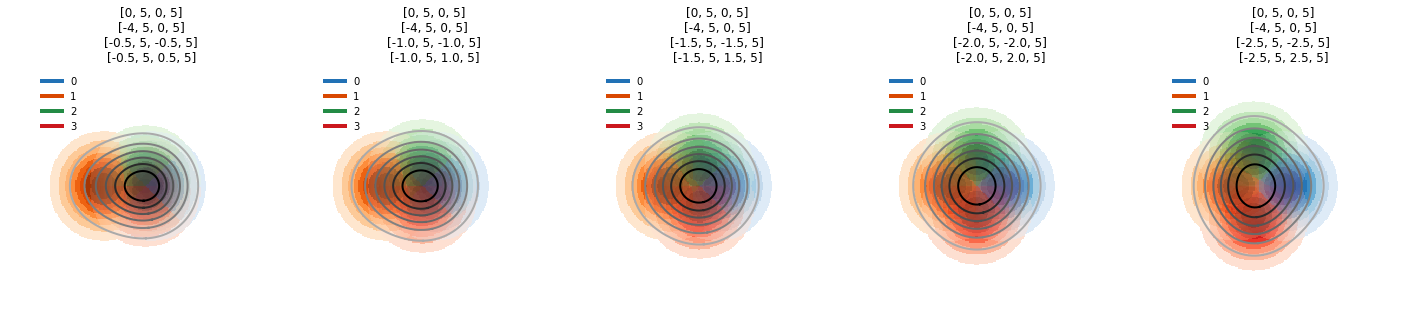

In [35]:
picture_worker.plot_images(images_overlapping, gaussians, z_sums, color_codes, contour_lines_method="equal_value", num_of_levels=5)

['mu_x', 'variance_x', 'mu_y', 'variance_y']


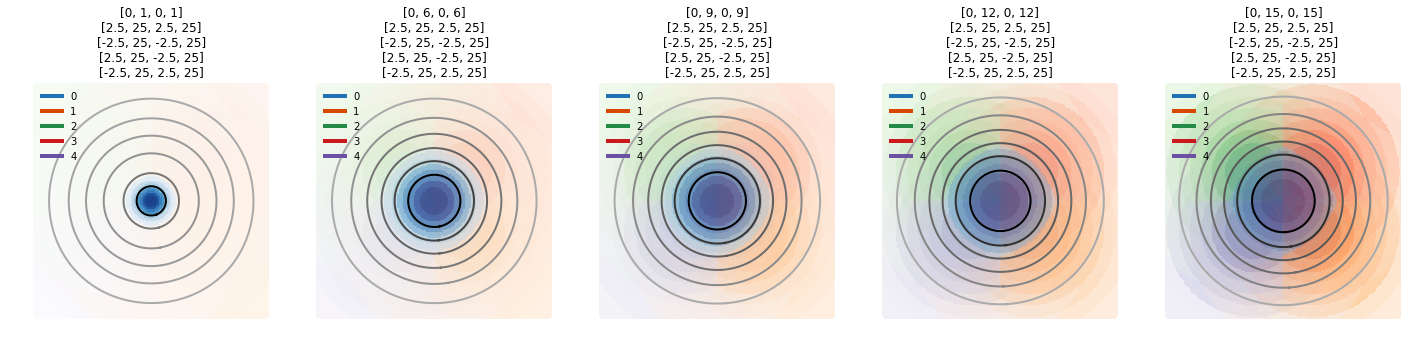

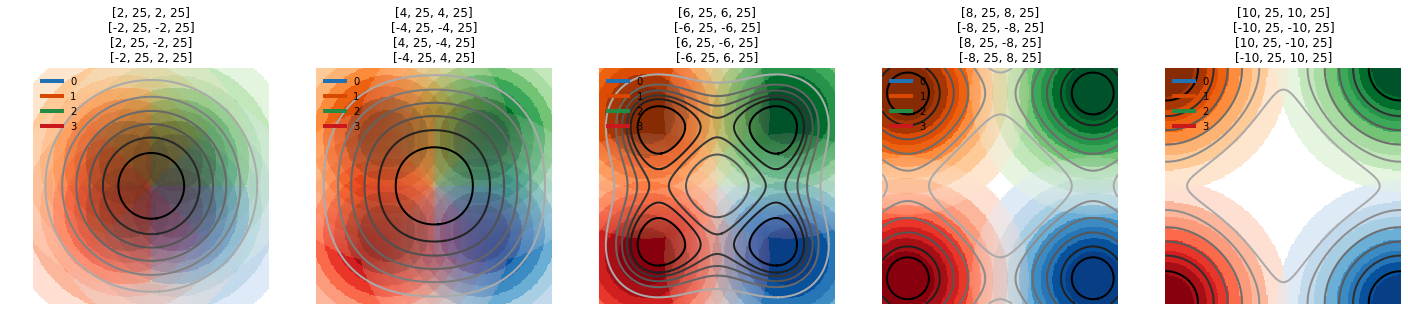

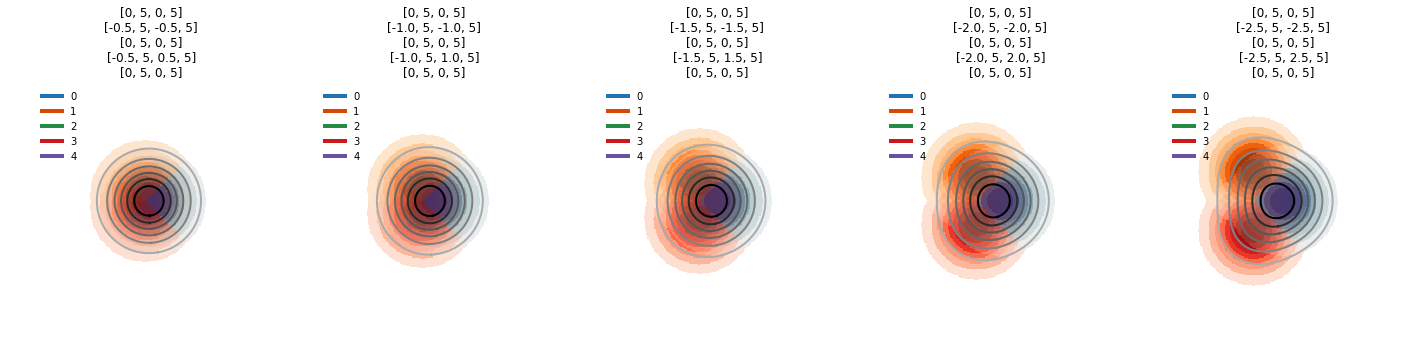

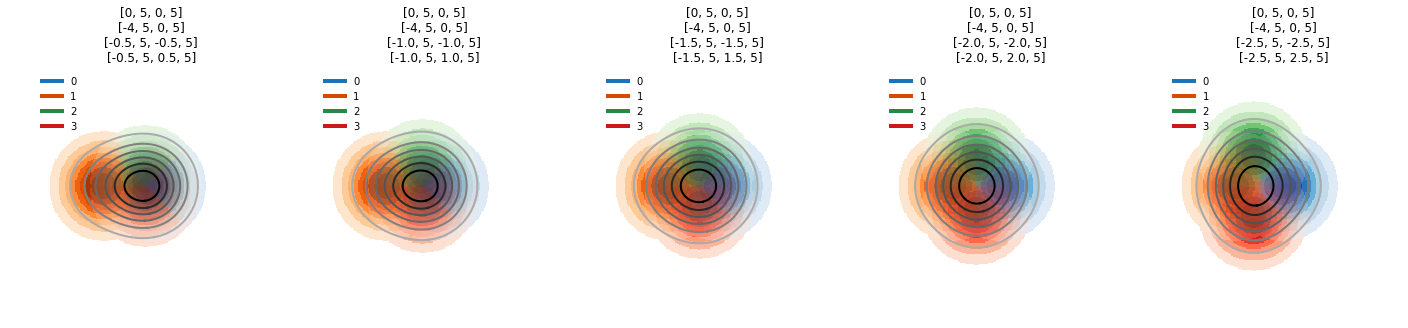

In [37]:
picture_worker.plot_images(images_overlapping, gaussians, z_sums, color_codes, contour_lines_method="equal_density", num_of_levels=5)

['mu_x', 'variance_x', 'mu_y', 'variance_y']


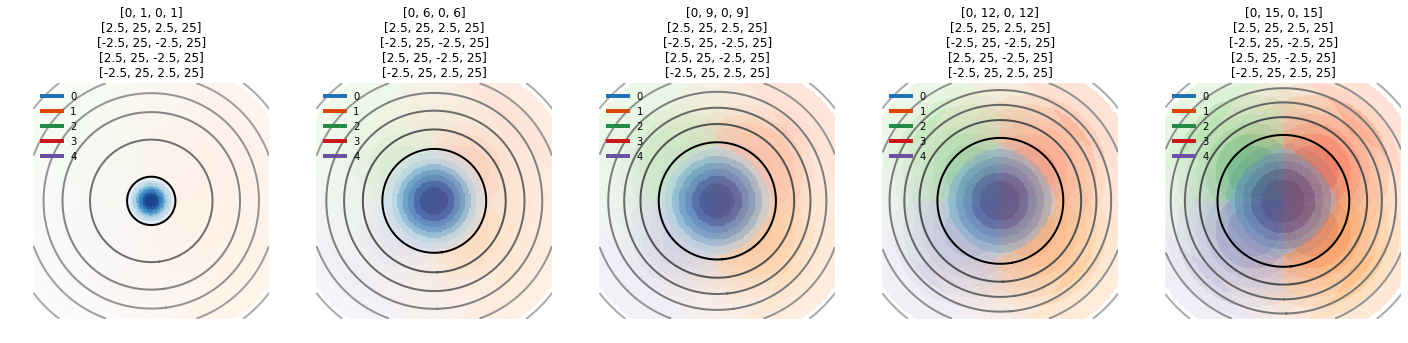

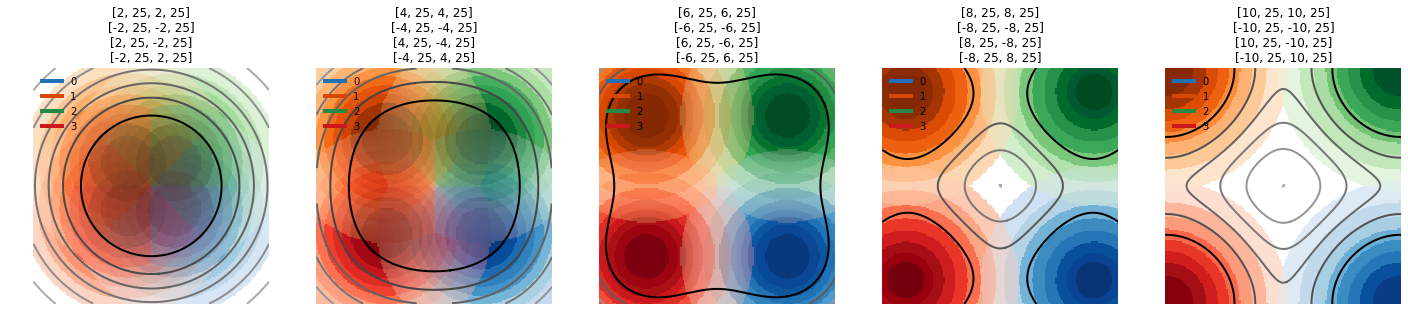

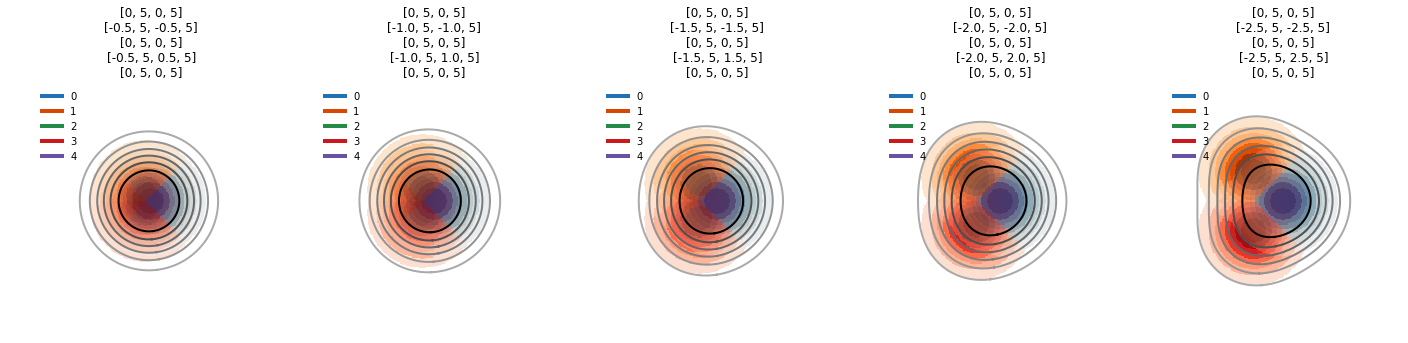

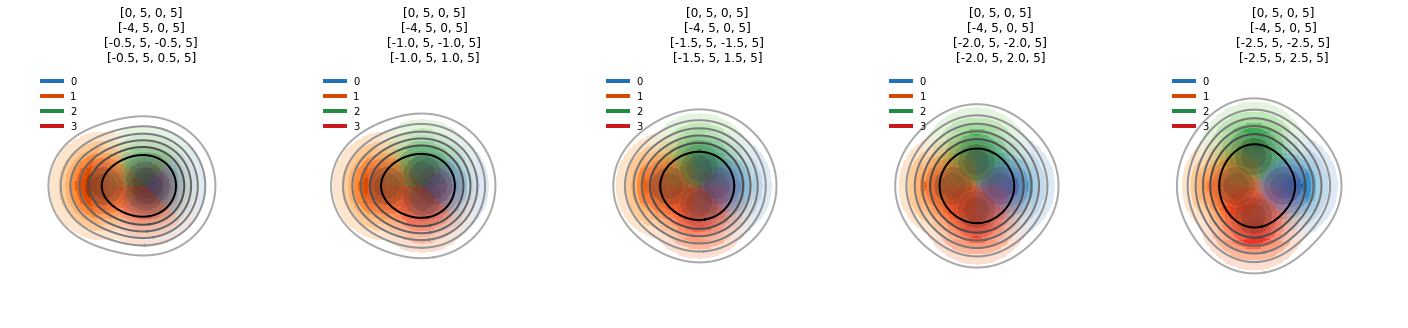

In [38]:
picture_worker.plot_images(images_overlapping_equal, gaussians_equal, z_sums_equal, color_codes, contour_lines_method="equal_horizontal", num_of_levels=5)

['mu_x', 'variance_x', 'mu_y', 'variance_y']


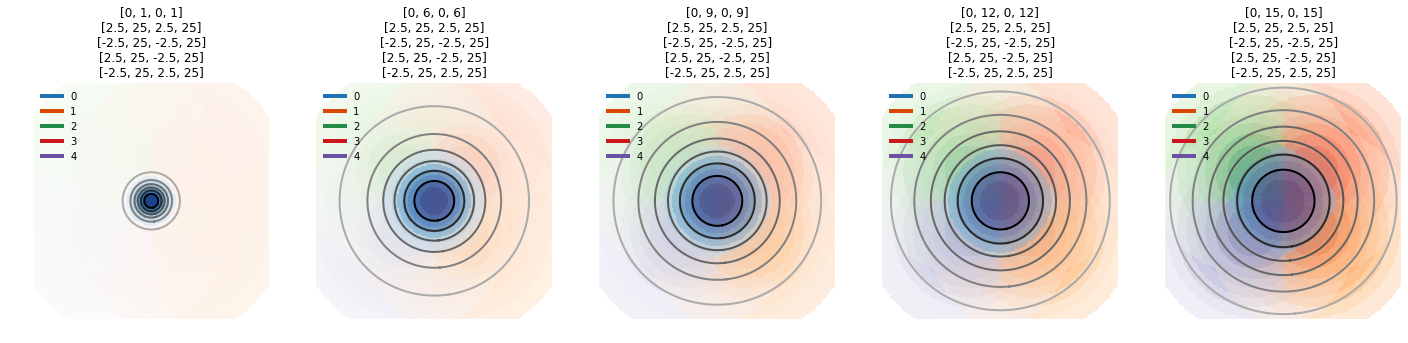

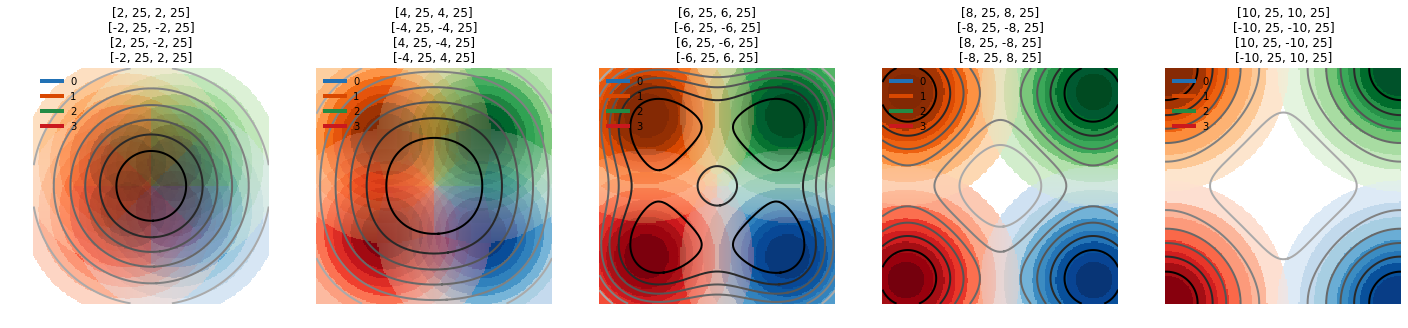

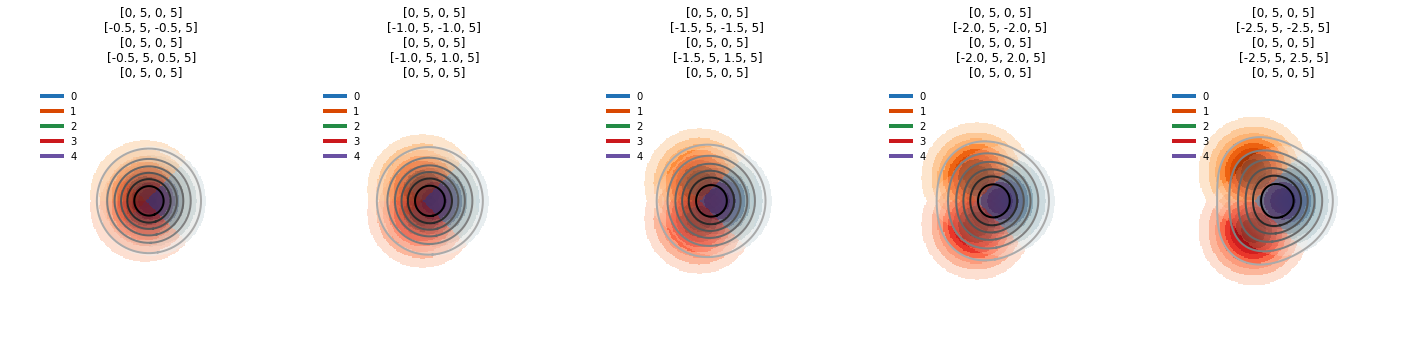

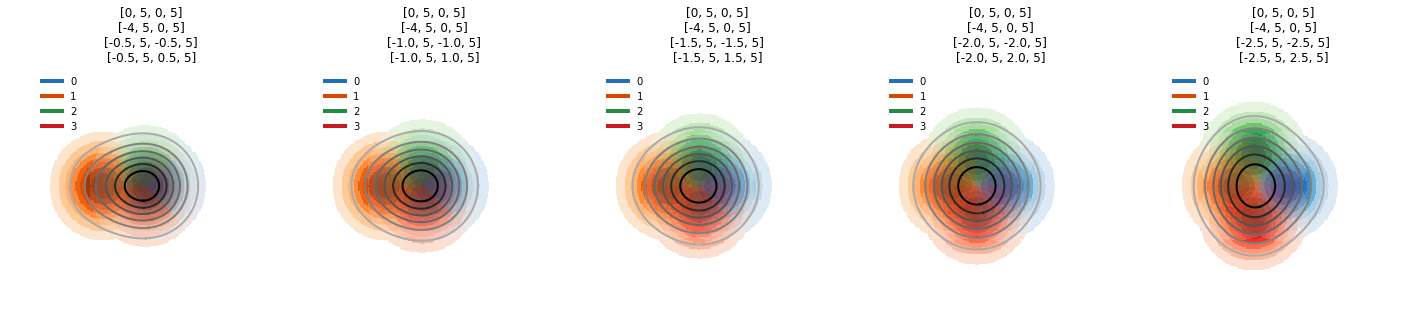

In [41]:
picture_worker.plot_images(images_overlapping_equal, gaussians_equal, z_sums_equal, color_codes, contour_lines_method="normal", num_of_levels=5)